In [6]:
# Manually specify all fields from the Open Food Facts data-fields.txt
fields = [
    # General Product Information
    "_id", "product_name", "brands", "categories", "countries", "countries_tags",
    "ingredients_text", "labels", "quantity", "packaging", "additives_tags",
    "allergens", "allergens_tags", "traces", "traces_tags", "ingredients_analysis_tags",
    
    # Nutri-Score and NOVA
    "nutriscore_grade", "nutriscore_score", "nova_group",
    
    # Nutritional Information (100g)
    "nutriments.energy_100g", "nutriments.energy-kj_100g", "nutriments.energy-kcal_100g",
    "nutriments.fat_100g", "nutriments.saturated-fat_100g", "nutriments.trans-fat_100g",
    "nutriments.cholesterol_100g", "nutriments.carbohydrates_100g", "nutriments.sugars_100g",
    "nutriments.fiber_100g", "nutriments.proteins_100g", "nutriments.salt_100g",
    "nutriments.sodium_100g", "nutriments.vitamin-a_100g", "nutriments.vitamin-c_100g",
    "nutriments.calcium_100g", "nutriments.iron_100g", "nutriments.potassium_100g",
    "nutriments.magnesium_100g", "nutriments.phosphorus_100g", "nutriments.zinc_100g",
    "nutriments.copper_100g", "nutriments.manganese_100g", "nutriments.selenium_100g",
    "nutriments.vitamin-d_100g", "nutriments.vitamin-e_100g", "nutriments.vitamin-k_100g",
    "nutriments.thiamin_100g", "nutriments.riboflavin_100g", "nutriments.niacin_100g",
    "nutriments.vitamin-b6_100g", "nutriments.folate_100g", "nutriments.vitamin-b12_100g",
    "nutriments.biotin_100g", "nutriments.pantothenic-acid_100g", "nutriments.water_100g",
    
    # Images and Links
    "image_url", "image_nutrition_url", "image_ingredients_url", "url",
    
    # Miscellaneous
    "environment_impact_level_tags", "ecoscore_grade", "ecoscore_score"
]



USING THE LARGE DATASET

In [2]:
import pandas as pd

# Path to the cleaned CSV file
cleaned_csv_path = "openfoodfacts_cleaned.csv"

# Load the cleaned dataset
df_cleaned = pd.read_csv(cleaned_csv_path)

# Display basic information about the dataset
print("Dataset Info:")
print(df_cleaned.info())
print("\nDataset Preview:")
print(df_cleaned.head())

C:\Users\pc\AppData\Local\Temp\ipykernel_40468\629814157.py:7: DtypeWarning: Columns (0,11,14,15,16,17,23,24,25,26,27,31,32,33,34,35,36,37,45,50,51,52,53,56,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cleaned = pd.read_csv(cleaned_csv_path)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326797 entries, 0 to 3326796
Columns: 206 entries, code to acidity_100g
dtypes: float64(126), int64(2), object(78)
memory usage: 5.1+ GB
None

Dataset Preview:
  code                                                url     creator  \
0    1  http://world-en.openfoodfacts.org/product/0000...         inf   
1    2  http://world-en.openfoodfacts.org/product/0000...     kiliweb   
2    3  http://world-en.openfoodfacts.org/product/0000...  prepperapp   
3    4  http://world-en.openfoodfacts.org/product/0000...      elcoco   
4    5  http://world-en.openfoodfacts.org/product/0000...   touchette   

    created_t      created_datetime  last_modified_t last_modified_datetime  \
0  1634745456  2021-10-20T15:57:36Z       1732023063   2024-11-19T13:31:03Z   
1  1722606455  2024-08-02T13:47:35Z       1731513697   2024-11-13T16:01:37Z   
2  1716818343  2024-05-27T13:59:03Z       1731942520   2024-11-18T15:08:40Z   
3  1560176426  2019-

In [3]:
# Inspect basic statistics of key columns
print("\nStatistics for 'energy_100g':")
print(df_cleaned["energy_100g"].describe())

# Inspect a sample of data
print("\nSample values for 'energy_100g':")
print(df_cleaned["energy_100g"].sample(10))



Statistics for 'energy_100g':
count    3.326797e+06
mean     4.794517e+10
std      6.379698e+13
min     -2.210000e+02
25%      5.500000e+01
50%      6.990000e+02
75%      1.523000e+03
max      1.000000e+17
Name: energy_100g, dtype: float64

Sample values for 'energy_100g':
1605154       0.0
2077827       0.0
973531      849.0
650828        0.0
2094957    2240.0
2241550       0.0
2895823    1971.0
3211928       0.0
1077080     456.0
3294871    2067.0
Name: energy_100g, dtype: float64


In [10]:
df_cleaned = df_cleaned.dropna(subset=["product_name"])

# Fill numeric columns with 0 and keep textual columns as is
numeric_columns = df_cleaned.select_dtypes(include=["float64", "int64"]).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(0)

# Display cleaned dataset info
print("Cleaned Dataset Info:")
print(df_cleaned.info())

Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3326797 entries, 0 to 3326796
Columns: 206 entries, code to acidity_100g
dtypes: float64(126), int64(2), object(78)
memory usage: 5.1+ GB
None


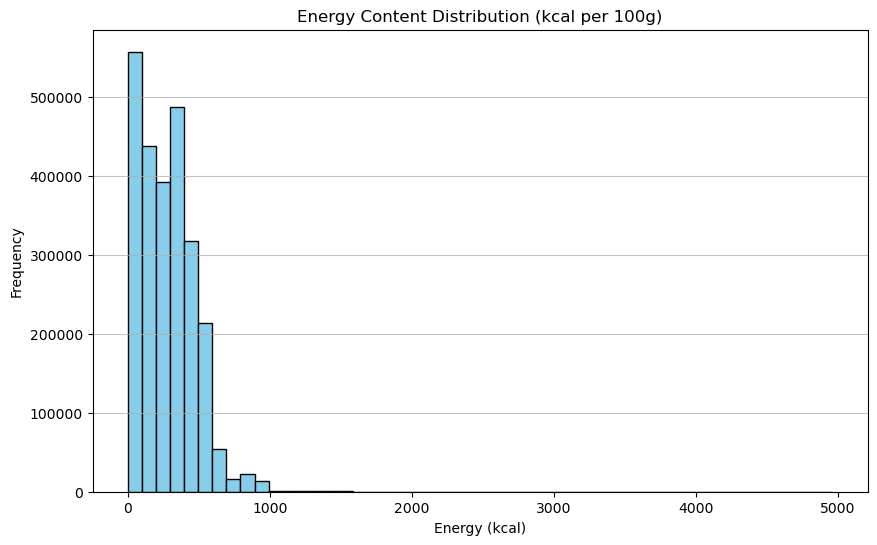

In [18]:
import matplotlib.pyplot as plt

# Ensure the 'energy-kcal_100g' column exists
if 'energy-kcal_100g' in df_cleaned.columns:
    # Drop missing values and filter valid range
    valid_kcal_data = df_cleaned['energy-kcal_100g'].dropna()
    valid_kcal_data = valid_kcal_data[(valid_kcal_data > 0) & (valid_kcal_data < 5000)]  # Set reasonable bounds
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(valid_kcal_data, bins=50, color='skyblue', edgecolor='black')
    plt.title("Energy Content Distribution (kcal per 100g)")
    plt.xlabel("Energy (kcal)")
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.75)
    plt.show()
else:
    print("Column 'energy-kcal_100g' is not available in the dataset.")


COP Intial Implementation

In [20]:
!pip install ortools

   ---------------------------------------- 0.0/142.5 MB ? eta -:--:--
   ---------------------------------------- 0.1/142.5 MB 2.4 MB/s eta 0:01:00
   ---------------------------------------- 0.5/142.5 MB 5.7 MB/s eta 0:00:26
   ---------------------------------------- 1.0/142.5 MB 7.4 MB/s eta 0:00:20
   ---------------------------------------- 1.6/142.5 MB 8.6 MB/s eta 0:00:17
    --------------------------------------- 2.3/142.5 MB 9.8 MB/s eta 0:00:15
    --------------------------------------- 3.0/142.5 MB 10.8 MB/s eta 0:00:13
   - -------------------------------------- 3.6/142.5 MB 10.9 MB/s eta 0:00:13
   - -------------------------------------- 4.4/142.5 MB 12.3 MB/s eta 0:00:12
   - -------------------------------------- 4.9/142.5 MB 12.1 MB/s eta 0:00:12
   - -------------------------------------- 5.4/142.5 MB 11.9 MB/s eta 0:00:12
   - -------------------------------------- 5.9/142.5 MB 11.7 MB/s eta 0:00:12
   - -------------------------------------- 6.3/142.5 MB 11.5 MB/

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 5.26.1 which is incompatible.


In [25]:
def search_and_select_foods(df):
    """Allow the user to search for foods and select items for breakfast, lunch, and dinner."""
    
    meals = {"Breakfast": [], "Lunch": [], "Dinner": []}
    
    for meal in meals.keys():
        print(f"\n--- {meal} Selection ---")
        
        while True:
            # Search for foods
            query = input(f"Enter a keyword to search for foods for {meal} (or type 'done' to finish): ").strip()
            if query.lower() == 'done':
                break
            
            search_results = search_local_dataset(df, query)
            
            if not search_results.empty:
                # Display results
                print("\nSearch Results:")
                for idx, row in search_results.iterrows():
                    print(f"{idx + 1}. {row['product_name']} - Energy: {row['energy-kcal_100g']} kcal, Protein: {row['proteins_100g']} g, Fat: {row['fat_100g']} g, Carbs: {row['carbohydrates_100g']} g")
                
                # Allow selection
                while True:
                    selection = input(f"Select a food item for {meal} by entering the number (or type 'back' to search again): ").strip()
                    if selection.lower() == 'back':
                        break
                    try:
                        selected_idx = int(selection) - 1
                        selected_food = search_results.iloc[selected_idx]
                        meals[meal].append(selected_food['product_name'])
                        print(f"Added '{selected_food['product_name']}' to {meal}.")
                    except (ValueError, IndexError):
                        print("Invalid selection. Please enter a valid number from the list.")
            else:
                print("No matching products found. Please try a different keyword.")
    
    return meals


# Usage Example
print("\nStart selecting foods for your meals!")
selected_meals = search_and_select_foods(df_cleaned)

print("\nYour Meal Plan:")
for meal, foods in selected_meals.items():
    print(f"{meal}: {', '.join(foods) if foods else 'No selection'}")



Start selecting foods for your meals!

--- Breakfast Selection ---

Search Results:
111. Milk away protein - Energy: 378.0 kcal, Protein: 58.0 g, Fat: 10.0 g, Carbs: 7.0 g
168. Buttermilk pancake & waffle mix - Energy: 375.0 kcal, Protein: 7.8125 g, Fat: 5.46875 g, Carbs: 71.875 g
465. Hershey s milk nuggets - Energy: 0.0 kcal, Protein: 0.0 g, Fat: 0.0 g, Carbs: 0.0 g
665. Organic Milk Protein Concentrate 85 Non-GMO Project Verified - Energy: 0.0 kcal, Protein: 0.0 g, Fat: 0.0 g, Carbs: 0.0 g
666. Milk Protein Concentrate 85 Non-GMO Project Verified - Energy: 0.0 kcal, Protein: 0.0 g, Fat: 0.0 g, Carbs: 0.0 g
710. Donut Milka - Energy: 465.0 kcal, Protein: 6.0 g, Fat: 28.0 g, Carbs: 46.5 g
715. Isagenix milk chocolate - Energy: 526.0 kcal, Protein: 8.8 g, Fat: 26.3 g, Carbs: 52.6 g
949. Milk - Energy: 0.0 kcal, Protein: 0.0 g, Fat: 0.0 g, Carbs: 0.0 g
968. Bebida de proteína en polvo / Proteínas drink milk - Energy: 421.0 kcal, Protein: 64.3 g, Fat: 11.1 g, Carbs: 17.9 g
1196. Milk - 